In [147]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm
# Import API key
import api_keys
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
#!pip install citipy

## Generate Cities List

In [150]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


619

## Perform API Calls

In [151]:
# OpenWeatherMap API Key
#api_key=api_keys.api_key
api_key ="f9f7897ff945966519c6af398c9943ef"
lat = []
lon=[]
Country=[]
Date=[]
Humidity=[]
MaxTemp=[]
Windspeed=[]
Cloudiness=[]
valid_city=[]

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
city_url = url + '&units=imperial' + '&q='
for city in cities:
    query_url = city_url + city
    response = requests.get(query_url).json()
    try:
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        Country.append(response["sys"]["country"])
        Date.append(response["dt"])
        Humidity.append(response["main"]["humidity"])
        Windspeed.append(response["wind"]["speed"])
        MaxTemp.append(response["main"]["temp_max"])
        Cloudiness.append(response["clouds"]["all"])
        if response["coord"]["lat"]!= None:
            valid_city.append(city)
    except KeyError:
        print("Missing field/result... skipping.")
        continue

Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/

In [152]:
print(response)

{'coord': {'lon': 32.53, 'lat': 34.92}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 76.77, 'pressure': 1008, 'humidity': 83, 'temp_min': 73.4, 'temp_max': 78.8}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 330}, 'clouds': {'all': 20}, 'dt': 1535146200, 'sys': {'type': 1, 'id': 5450, 'message': 0.0051, 'country': 'CY', 'sunrise': 1535080634, 'sunset': 1535127977}, 'id': 146639, 'name': 'Lasa', 'cod': 200}


## Making Data fram of cities Weather and save it as csv file:

In [153]:
weather_dict = {
    "city": valid_city,
    "lat": lat,
    "Lng": lon,
    "Max Temp": MaxTemp,
    "Date": Date,
    "Country": Country,
    "Wind speed": Windspeed,
    "Humidity": Humidity,
    "Cloudiness": Cloudiness
}

city_pd=pd.DataFrame.from_dict(weather_dict)
city_pd.to_csv("cities.csv")
city_pd.head()



,city,lat,Lng,Max Temp,Date,Country,Wind speed,Humidity,Cloudiness
0,mataura,-46.19,168.86,43.04,1535147337,NZ,11.77,84,76
1,dunedin,-45.87,170.50,40.43,1535147337,NZ,15.46,85,12
2,winnemucca,40.97,-117.74,87.98,1535144160,US,17.22,4,1
3,hermanus,-34.42,19.24,42.32,1535147338,ZA,2.04,92,8
4,sao gabriel da cachoeira,-0.13,-67.09,88.22,1535147338,BR,1.59,59,12


### Is null value in city


In [154]:
city_pd.isnull().any()

city          False
lat           False
Lng           False
Max Temp      False
Date          False
Country       False
Wind speed    False
Humidity      False
Cloudiness    False
dtype: bool

# Plotting Result

## 1:  latitude vs Temperature 

<IPython.core.display.Javascript object>


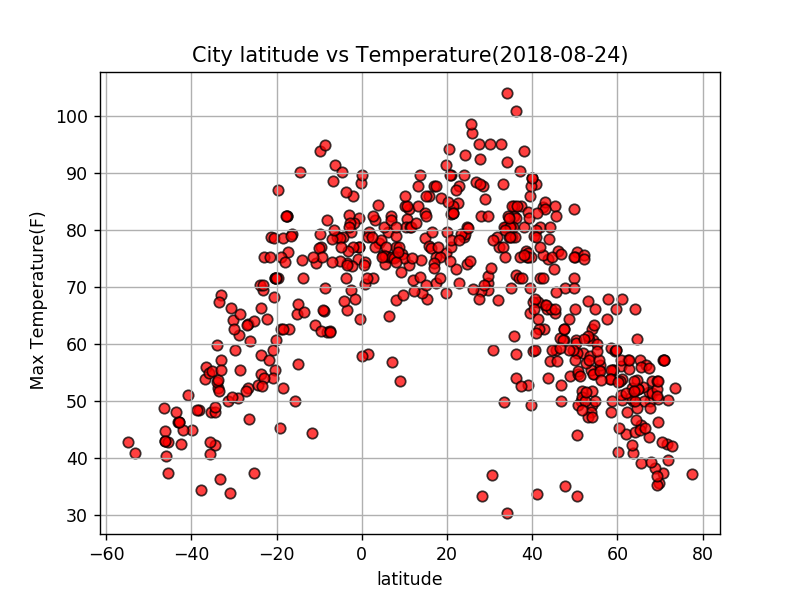

In [155]:
%matplotlib notebook
fig = plt.figure()
latitude = city_pd['lat'].values
Temperature  = city_pd['Max Temp'].values

Temperature = plt.scatter(latitude,Temperature , marker="o", facecolors="red", edgecolors="black",
           alpha=0.75, label="Temperature")
from datetime import datetime
curentDate= city_pd["Date"][0]
date=datetime.utcfromtimestamp(curentDate).strftime('%Y-%m-%d')
plt.title(f"City latitude vs Temperature({date})")
plt.xlabel("latitude")
plt.ylabel(" Max Temperature(F)")
plt.grid()
plt.show()


In [156]:
fig.savefig('City latitude vs Temperature.png')


In [159]:
#finding the changing point between posetive and negative correlation. 
#find maximun temperature 
maxtem=max(city_pd['Max Temp'].tolist())
#filter dataframe to finde latitude for max Temp
filter=city_pd.loc[city_pd["Max Temp"]==maxtem,:]
#find max and min for lat
min_lat=min(lat)
max_lat=max(lat)
#take value for changing point latitude
change_point=filter["lat"].values[0]
# seprate city_df in two data frame before change point in latitude and after that .
posetive=city_pd.loc[city_pd['lat']<=change_point,:]
negative=city_pd.loc[city_pd['lat']>change_point,:]

### calculate Correclation between latitude vs Temperature and Result:

In [160]:
pc=np.corrcoef(posetive['lat'],posetive['Max Temp'])[0][1]
nc=np.corrcoef(negative['lat'],negative['Max Temp'])[0][1]

In [161]:
print("According to City latitude vs Temperature Analysis:")
print("----------------------------------------------")
print(f"There is a Posetive correlation between city latitude in range ({min_lat}: {change_point}) and  max Temperature for city")
print(f"posetive correlation between  City latitude vs Temperature is {pc}." )
print(f"There is a Negative correlation between city latitude in range ({change_point}: {max_lat}) and  max Temperature for city")
print(f" Negative correlation between  City latitude vs Temperature is {nc}." )
#print(f"There is a Negative correlation between city latitude in range ({filter['lat'].values[0]}: {max_lat}) and  max Temperature for city")


According to City latitude vs Temperature Analysis:
----------------------------------------------
There is a Posetive correlation between city latitude in range (-54.81: 34.14) and  max Temperature for city
posetive correlation between  City latitude vs Temperature is 0.6795653475393564.
There is a Negative correlation between city latitude in range (34.14: 77.48) and  max Temperature for city
 Negative correlation between  City latitude vs Temperature is -0.7041354720004794.


## 2: City latitude vs Cloudiness 

<IPython.core.display.Javascript object>


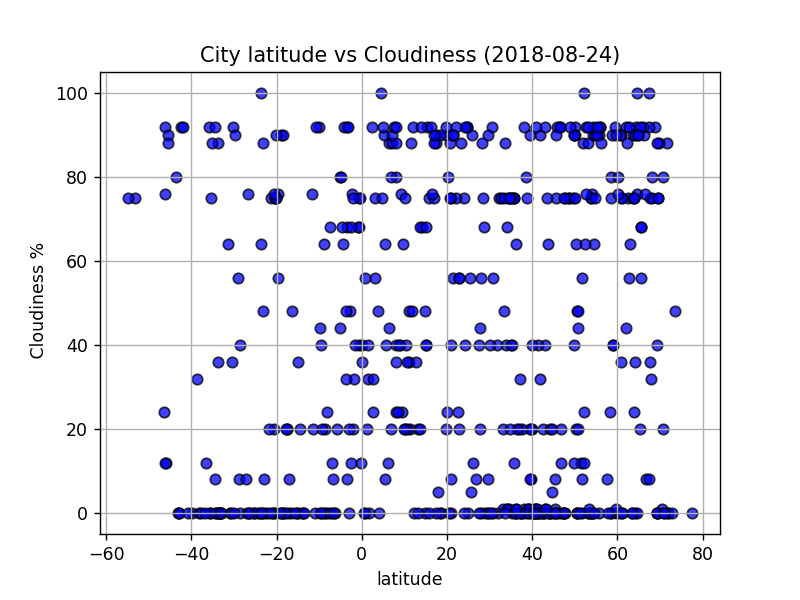

In [162]:
fig = plt.figure()
latitude = city_pd['lat'].values
Cloudiness= city_pd['Cloudiness'].values

Temperature = plt.scatter(latitude,Cloudiness , marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75, label="Cloudiness")
from datetime import datetime
curentDate= city_pd["Date"][0]
date=datetime.utcfromtimestamp(curentDate).strftime('%Y-%m-%d')

plt.title(f"City latitude vs Cloudiness ({date})")
plt.xlabel("latitude")
plt.ylabel(" Cloudiness %")
plt.grid()
plt.show()


In [72]:
fig.savefig('City latitude vs Cloudiness .png')

### Calculate Correlation between latitude vs Cloudiness and Result:

In [164]:
cf= np.corrcoef(city_pd['lat'],city_pd['Cloudiness'])[0][1]


In [165]:
print("According to City latitude vs Cloudiness Analysis:")
print("----------------------------------------------")
print(f"There is no  specifice correlation between city's latitude and Cloudniess")
print(f"The correlation between City latitude vs Cloudiness is {cf}, and this is very low ")


According to City latitude vs Cloudiness Analysis:
----------------------------------------------
There is no  specifice correlation between city's latitude and Cloudniess
The correlation between City latitude vs Cloudiness is 0.10242227631279131, and this is very low 


## 2: City latitude vs Wind speed

<IPython.core.display.Javascript object>


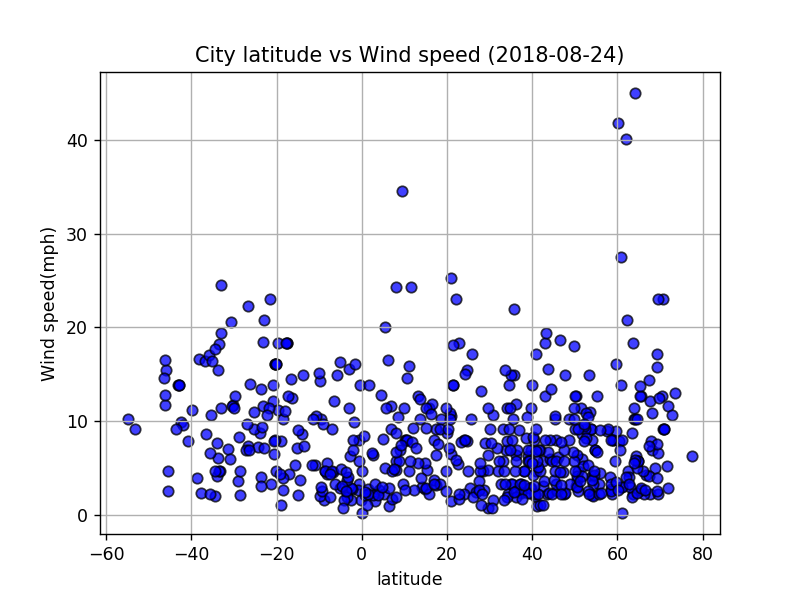

In [166]:
fig = plt.figure()
latitude = city_pd['lat'].values
Windspeed= city_pd['Wind speed'].values

Temperature = plt.scatter(latitude,Windspeed , marker="o", facecolors="blue", edgecolors="black",
           alpha=0.75, label="Wind speed")
from datetime import datetime
curentDate= city_pd["Date"][0]
date=datetime.utcfromtimestamp(curentDate).strftime('%Y-%m-%d')
plt.title(f"City latitude vs Wind speed ({date})")
plt.xlabel("latitude")
plt.ylabel("Wind speed(mph)")
plt.grid()
plt.show()

In [167]:
fig.savefig('City latitude vs Wind speed .png')

### Calculate Correlation between latitude vs wind speed and Result:

In [168]:
wc=np.corrcoef(city_pd['lat'],city_pd['Wind speed'])[0][1]

In [169]:
print("According to City latitude vs Cloudiness Analysis:")
print("----------------------------------------------")
print(f"The correlation between city latitude vs wind speed is {wc} and this is negative and very low.")
print("The avarage wind speed for most of cityis is in range 0 to 20")

According to City latitude vs Cloudiness Analysis:
----------------------------------------------
The correlation between city latitude vs wind speed is -0.10495327759495732 and this is negative and very low.
The avarage wind speed for most of cityis is in range 0 to 20
